<a href="https://colab.research.google.com/github/celsosoaresss/Machine_Learning/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bibliotecas necessárias**

In [2]:
import pandas as pd

# **importando a base de dados e manupulando ela**

In [23]:
df = pd.read_csv('/content/loan_approval_dataset.csv', sep=',')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [24]:
df.info()
print('----------------------------------------')
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
---------------

In [25]:
#apagar coluna
df.drop('loan_id', axis = 1, inplace = True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [28]:
df[' education'].replace(' Graduate', 1, inplace = True)
df[' education'].replace(' Not Graduate', 0, inplace = True)

df[' self_employed'].replace(' No', 0, inplace = True)
df[' self_employed'].replace(' Yes', 1, inplace = True)

df[' loan_status'].replace(' Approved', 1, inplace = True)
df[' loan_status'].replace(' Rejected', 0, inplace = True)

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [51]:
#separar X e y
X = df.drop(' loan_status', axis = 1)
y = df[' loan_status'].values

print(X.shape, y.shape)

(4269, 11) (4269,)


In [52]:
#separando a base de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3415, 11) (854, 11) (3415,) (854,)


In [31]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=661372342984203691325c7fd0813c51eed027d706384f4718a1fa443f386464
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [36]:
#rodando a otmização com o TPOT
import tpot

tpot = tpot.TPOTClassifier(generations = 25, population_size=25, verbosity= 2, scoring='accuracy')
tpot.fit(X_train, y_train)

tpot.score(X_test, y_test)

## o código usado foi gerado utilizadno generations = 25, population_size=25

Optimization Progress:   0%|          | 0/650 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=9, max_features=0.4, min_samples_leaf=20, min_samples_split=2, n_estimators=100, subsample=1.0)


0.9800936768149883

In [35]:
tpot.export('best_pipeline.py')

In [53]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler, RobustScaler

In [54]:
#separar X e y
X = df.drop(' loan_status', axis = 1)
y = df[' loan_status'].values

#separando a base de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = make_pipeline(
    RobustScaler(),
    MaxAbsScaler(),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=10, max_features=0.7500000000000001, min_samples_leaf=4, min_samples_split=13, n_estimators=100, subsample=0.9000000000000001)
)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.99      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



<Axes: >

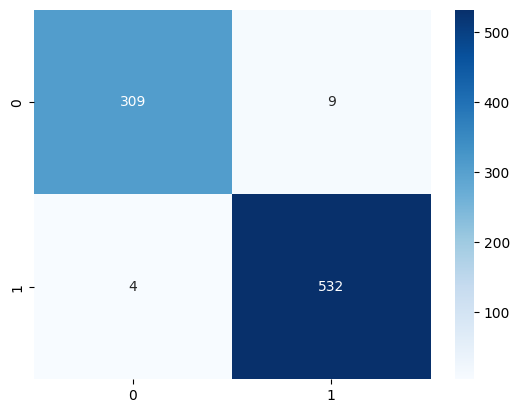

In [58]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")